<a href="https://colab.research.google.com/github/MIROLINIX/machine-learning-bootcamp/blob/main/drzewa%20i%20lasy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from IPython.display import Image

sns.set(font_scale=1.3)
np.random.seed(42)

In [2]:
raw_data = load_iris()
all_data = raw_data.copy()

data = all_data['data']
target = all_data['target']
feature_names = [name.replace(' ', '_')[:-5] for name in all_data['feature_names']]
target_names = all_data['target_names']

print(f'Liczba próbek: {len(data)}')
print(f'Kształt danych: {data.shape}')
print(f'Nazwy zmiennych objaśniających: {feature_names}')
print(f'Nazwy kategorii kosaćca: {target_names}')

Liczba próbek: 150
Kształt danych: (150, 4)
Nazwy zmiennych objaśniających: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
Nazwy kategorii kosaćca: ['setosa' 'versicolor' 'virginica']


In [3]:
df = pd.DataFrame(data=np.c_[data, target], columns=feature_names + ['target'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


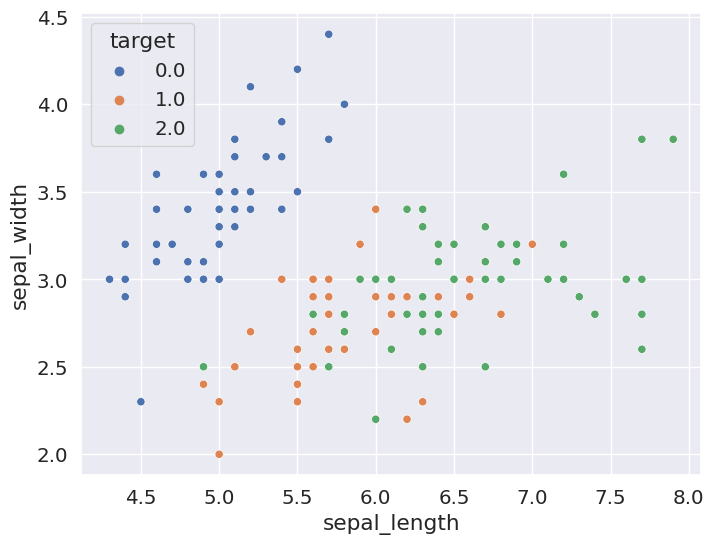

In [18]:
plt.figure(figsize=(8, 6))
_ = sns.scatterplot(data=df, x='sepal_length', y='sepal_width', hue='target', legend='full', palette=sns.color_palette()[:3])

In [5]:
df['target'].value_counts()

0.0    50
1.0    50
2.0    50
Name: target, dtype: int64

In [6]:
data = df.copy()
data = data[['sepal_length', 'sepal_width', 'target']]
target = data.pop('target')

data.head()

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [7]:
target.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: target, dtype: float64

In [8]:
data = data.values
target = target.values.astype('int16')

In [9]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(max_depth=1, random_state=42)
classifier.fit(data, target)

DecisionTreeClassifier(max_depth=1, random_state=42)

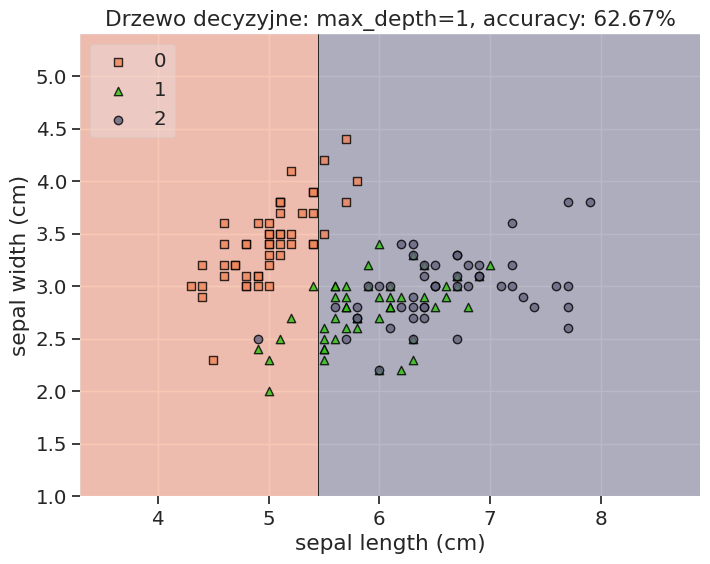

In [10]:
from mlxtend.plotting import plot_decision_regions

colors='#f1865b,#31c30f,#64647F,#d62728,#9467bd,#8c564b,#e377c2,#7f7f7f,#bcbd22,#17becf'

acc = classifier.score(data, target)

plt.figure(figsize=(8, 6))
plot_decision_regions(data, target, classifier, legend=2, colors=colors)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title(f'Drzewo decyzyjne: max_depth=1, accuracy: {acc * 100:.2f}%')
plt.show()

In [42]:
def make_decision_tree(max_depth=1):
    # trenowanie modelu
    classifier = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    classifier.fit(data, target)

    # eksport grafu drzewa

    # obliczenie dokładności
    acc = classifier.score(data, target)

    # wykreślenie granic decyzyjnych
    colors='#f1865b,#31c30f,#64647F,#d62728,#9467bd,#8c564b,#e377c2,#7f7f7f,#bcbd22,#17becf'
    plt.figure(figsize=(8, 6))
    ax = plot_decision_regions(data, target, classifier, legend=0, colors=colors)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, ['setosa', 'versicolor', 'virginica'], framealpha=0.3)
    plt.xlabel('sepal length (cm)')
    plt.ylabel('sepal width (cm)')
    plt.title(f'Drzewo decyzyjne: max_depth={max_depth}, accuracy: {acc * 100:.2f}%')
    plt.show()

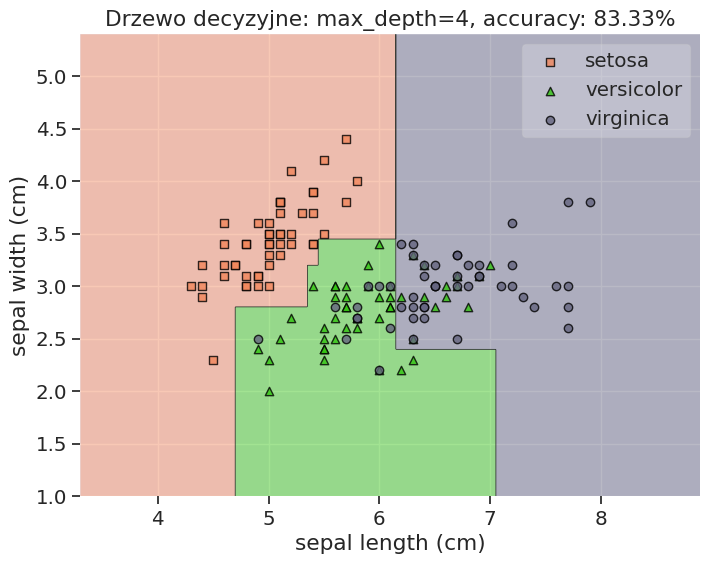

In [43]:
make_decision_tree(4)

In [32]:
def make_decision_forest(max_depth=1):
  from sklearn.ensemble import RandomForestClassifier
  classifier = RandomForestClassifier(n_estimators=max_depth, random_state=42)
  classifier.fit(data, target)

  acc = classifier.score(data, target)
  # obliczenie dokładności
  acc = classifier.score(data, target)

  # wykreślenie granic decyzyjnych
  colors='#f1865b,#31c30f,#64647F,#d62728,#9467bd,#8c564b,#e377c2,#7f7f7f,#bcbd22,#17becf'
  plt.figure(figsize=(8, 6))
  ax = plot_decision_regions(data, target, classifier, legend=0, colors=colors)
  handles, labels = ax.get_legend_handles_labels()
  ax.legend(handles, ['setosa', 'versicolor', 'virginica'], framealpha=0.3)
  plt.xlabel('sepal length (cm)')
  plt.ylabel('sepal width (cm)')
  plt.title(f'Las losowy: max_depth=1, accuracy: {acc * 100:.2f}%')
  plt.show()

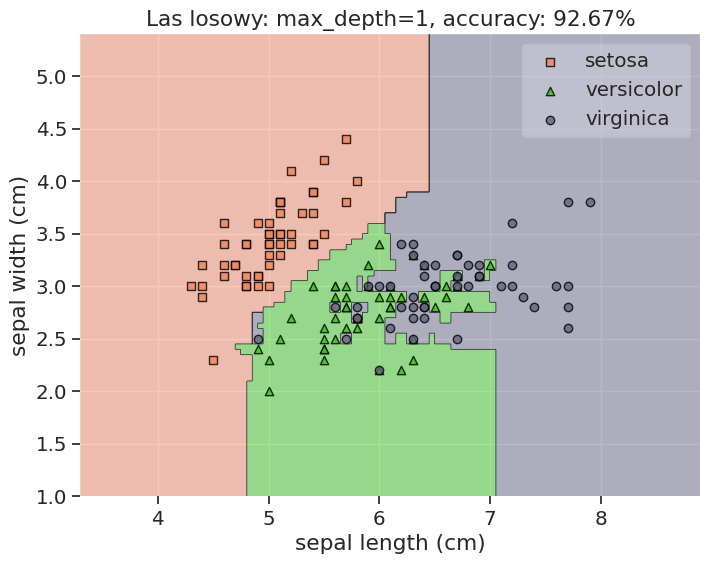

In [36]:
make_decision_forest(100)